# Multilanguage Architecture

In [1]:
from IPython.display import display, Image, HTML
from talktools import website, nbviewer

## Overview

Data science and scientific computing is a multi-language activity. We *love* Python, but insisting that everyone write everything in Python all the time is not realistic. The reality is that most large, complex projects involve multiple languages. In fact, it is commmon for projects to use at least three classes of languages:

* Low-level (C, C++, Java, Fortran)
* High-level (Python, Ruby, Perl, Julia, Bash, R)
* Web-based (JavaScript, CoffeeScript, HTML, CSS)

The goal of the Jupyter project is to provide a system for interactive computing that spans all of these languages.

It does this through two abstractions:

<div class="hbox">
<div class="box-flex1 idea-box panel panel-primary lead">Kernel Architecture</div>
<div class="box-flex1 idea-box panel panel-primary lead">Notebook documents</div>
</div>

## Kernel architecture

Jupyter has a powerful, open architecture for executing code interactively across networks:

* **Kernel:** runs code in a single language and returns results over a network.
* **App:** interactive user interface that enables the user to type code and see results. For example, the Notebook App.
* **Interactive Computing Protocol**: JSON/WebSocket/ZeroMQ based network protocol that allows kernels and apps to talk.

The default kernel for Jupyter is the IPython kernel and runs Python code. However, there are now kernels in other languages (see below).

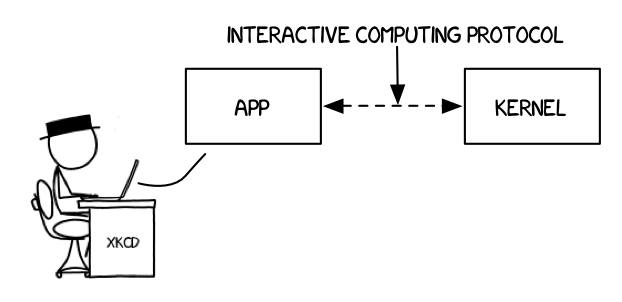

In [3]:
Image("images/AppKernel.png")

A single app, like the Notebook, can talk to kernels in different languages:

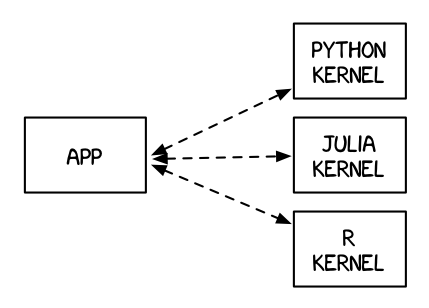

In [4]:
Image("images/MultilanguageKernels.png")

There are now Jupyter kernels for the following languages:

* Python 2 and 3 (https://github/ipython)
* Julia (https://github.com/JuliaLang/IJulia.jl)
* R (https://github.com/takluyver/IRkernel)
* Ruby (https://github.com/minrk/iruby)
* Haskell (https://github.com/gibiansky/IHaskell)
* Scala (https://github.com/Bridgewater/scala-notebook)
* node.js (https://gist.github.com/Carreau/4279371)
* Go (https://github.com/takluyver/igo)
* Bash (https://github.com/takluyver/bash_kernel)
* Others already and on the way

### Python 2 and 3

The syntax for the print statement in Python 2 and 3 changed:

In [5]:
print "This is Python 2!"

This is Python 2!


In [6]:
print("This is Python 3!")

This is Python 3!


numpy and matplotlib work fine in Python 2 and Python 3:

In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


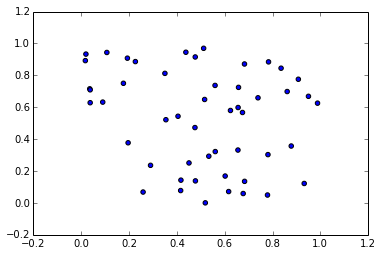

In [8]:
plt.scatter(np.random.rand(50), np.random.rand(50))

### R

R is a popular open-source statistical computing language. Here is a simple data set that is put into an R Data Frame and then plotted using R's [ggplot2](http://ggplot2.org/) library:

In [1]:
year <- c(2000 ,   2001  ,  2002  ,  2003 ,   2004)
rate <- c(9.34 ,   8.50  ,  7.62  ,  6.93  ,  6.60)
df = data.frame(year, rate)

In [2]:
head(df)

  year rate
1 2000 9.34
2 2001 8.50
3 2002 7.62
4 2003 6.93
5 2004 6.60

In [3]:
library(ggplot2)

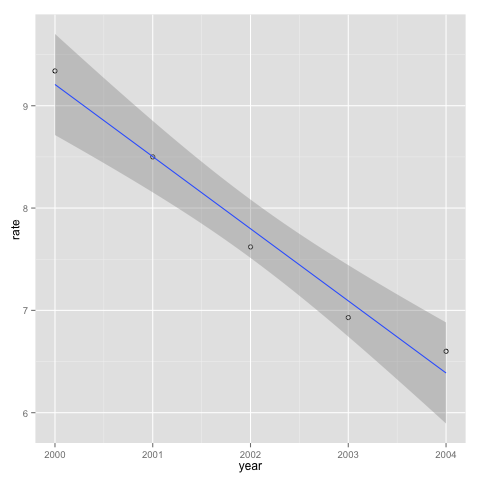

In [4]:
ggplot(df, aes(x=year, y=rate)) +
    geom_point(shape=1) +    # Use hollow circles
    geom_smooth(method=lm)   # Add linear regression line, with 95% confidence region

### Bash

The Bash kernel runs code cells as Bash commands in a persistent Bash shell:

In [1]:
df -H

Filesystem      Size   Used  Avail Capacity  iused    ifree %iused  Mounted on
/dev/disk0s2    499G   321G   178G    65% 78495691 43391051   64%   /
devfs           190k   190k     0B   100%      645        0  100%   /dev
map -hosts        0B     0B     0B   100%        0        0  100%   /net
map auto_home     0B     0B     0B   100%        0        0  100%   /home
map -fstab        0B     0B     0B   100%        0        0  100%   /Network/Servers


In [2]:
which python

/Users/bgranger/anaconda/bin/python


In [3]:
project="Jupyter"

In [4]:
echo "Hello to the $project project from $BASH"

Hello to the Jupyter project from /bin/bash


In [ ]:
e

### Magic commands

The standard IPython kernel also allows running code in other languages using the ``%%magic`` syntax.

Here is a bit of Ruby:

In [9]:
%%ruby
puts "Hello from Ruby #{RUBY_VERSION}"

Hello from Ruby 2.0.0


And some bash:

In [10]:
%%bash
echo "Hello from $BASH"

Hello from /bin/bash


Let's fit a linear model in R and visualize the results:

In [11]:
import numpy as np
X = np.array([0,1,2,3,4])
Y = np.array([3,5,4,6,7])
%load_ext rmagic

The `%%R` syntax tells IPython to run the rest of the cell as R code:


Call:
lm(formula = Y ~ X)

Residuals:
   1    2    3    4    5 
-0.2  0.9 -1.0  0.1  0.2 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   3.2000     0.6164   5.191   0.0139 *
X             0.9000     0.2517   3.576   0.0374 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7958 on 3 degrees of freedom
Multiple R-squared:   0.81,	Adjusted R-squared:  0.7467 
F-statistic: 12.79 on 1 and 3 DF,  p-value: 0.03739



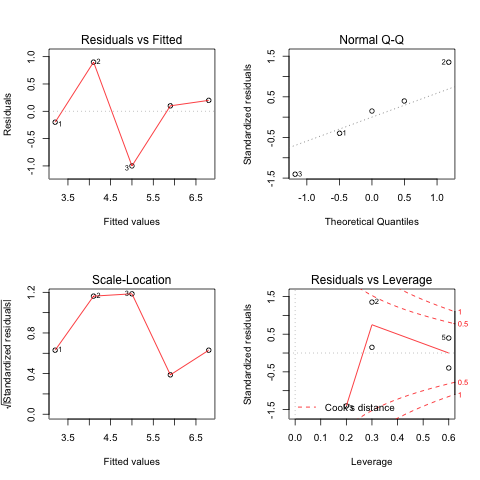

In [12]:
%%R -i X,Y -o XYcoef
XYlm = lm(Y~X)
XYcoef = coef(XYlm)
print(summary(XYlm))
par(mfrow=c(2,2))
plot(XYlm)

This `%%language` syntax is an IPython specific extension to the Python language and only works in the IPython kernel. This "magic command syntax" allows Python code to call out to a wide range of other languages (Ruby, Bash, Julia, Fortran, Perl, Octave, Matlab, etc.)

## Notebook documents

Notebook documents are JSON files that store code, output, text, images, HTML, etc. The notebook as a whole and individual cells have metadata associated with them. This metadata encodes which programming language the code cells are in. All other parts of the Notebook document format (output, images, equations, etc.) are completely language neutral.

Notebooks created in any language will work with the rest of our notebook architecture:

* nbconvert
* nbviewer

<div class="alert alert-success" style="margin: 5px 0px">
Jupyter notebooks are an **open**, **multilanguage** format for recording and sharing an interactive computation and results.
</div>

Here is a notebook that was created with the Julia kernel and then shared on nbviewer:

In [13]:
website("http://nbviewer.ipython.org/url/jdj.mit.edu/~stevenj/IJulia%20Preview.ipynb")

Here is a native R notebook based on an article at [538](http://fivethirtyeight.com/):

In [14]:
website('http://nbviewer.ipython.org/github/ellisonbg/data/blob/r-notebook/bechdel/analyze-bechdel.ipynb')

## Styling

In [2]:
HTML("""
<style>
.idea-box {
  text-align: center;
  padding: 20px;
  margin: 10px;
}
</style>
""")

LoadError: HTML not defined
while loading In[2], in expression starting on line 1